In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [2]:
data = pd.read_csv("C:global-data-on-sustainable-energy (1) (3).csv")

In [3]:
data

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [7]:
print(data.shape)

(3649, 21)


In [9]:
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [13]:
data.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


In [15]:
print(data.describe(include="object"))

             Entity Density
count          3649    3648
unique          176     124
top     Afghanistan      25
freq             21     147


In [17]:
print(data.isnull().sum())

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [19]:
for col in data.select_dtypes(include="object").columns:
    print(f"{col}: {data[col].unique()}")

Entity: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'French Guiana' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia' 'Lebanon'

In [21]:
print(data.duplicated().sum()) 

0


In [23]:
#Detecting outliers by IQR method
numerical_cols = data.select_dtypes(include=["number"]).columns

# Compute IQR for each numerical column
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).sum()

print("Number of outliers in each column:")
print(outliers)

Number of outliers in each column:
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                     0
Renewable-electricity-generating-capacity-per-capita                301
Financial flows to developing countries (US $)                      245
Renewable energy share in the total final energy consumption (%)      0
Electricity from fossil fuels (TWh)                                 518
Electricity from nuclear (TWh)                                      578
Electricity from renewables (TWh)                                   533
Low-carbon electricity (% electricity)                                0
Primary energy consumption per capita (kWh/person)                  237
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         278
Value_co2_emissions_kt_by_country                                   471
Renewables (% equivalent prim

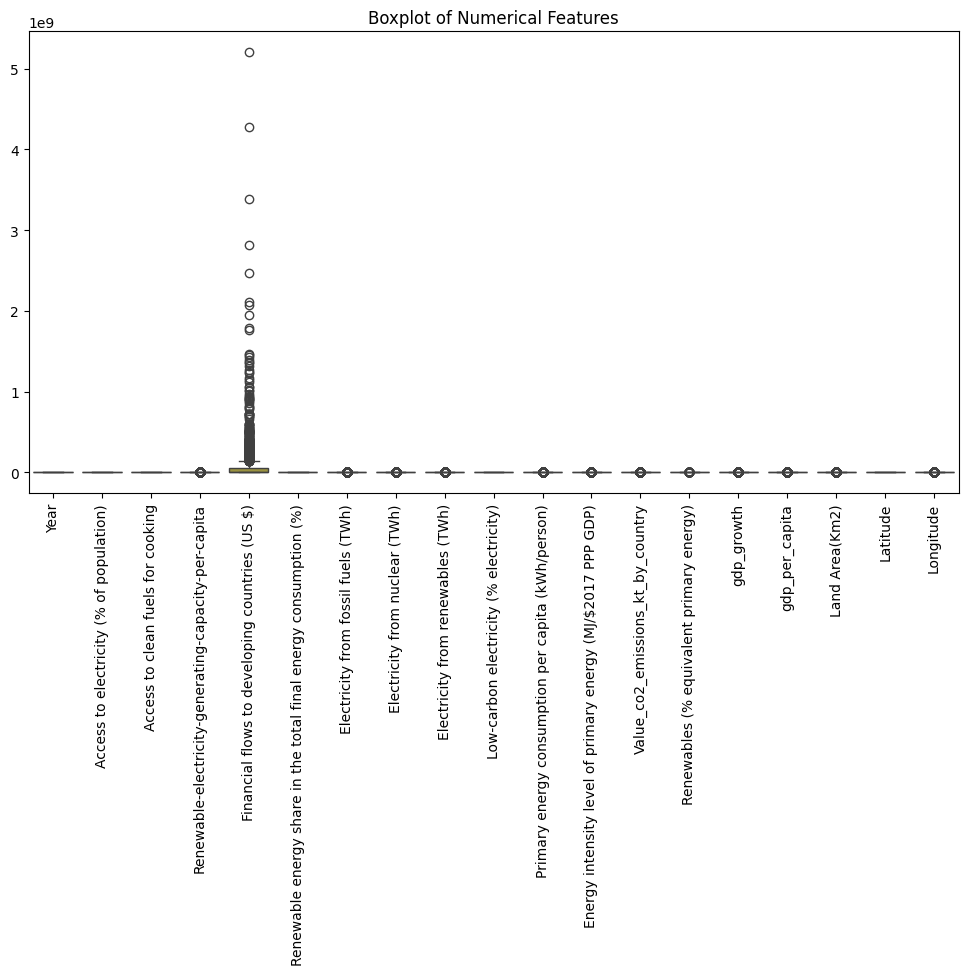

In [25]:
#Detecting outliers by Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

In [27]:
#Outlier detection by Z score
from scipy.stats import zscore

# Compute Z-scores
z_scores = data[numerical_cols].apply(zscore)

# Find outliers (values with |Z-score| > 3)
outliers_z = (z_scores.abs() > 3).sum()

print("Number of outliers using Z-score method:")
print(outliers_z)

Number of outliers using Z-score method:
Year                                                                  0
Access to electricity (% of population)                               0
Access to clean fuels for cooking                                     0
Renewable-electricity-generating-capacity-per-capita                  0
Financial flows to developing countries (US $)                        0
Renewable energy share in the total final energy consumption (%)      0
Electricity from fossil fuels (TWh)                                   0
Electricity from nuclear (TWh)                                        0
Electricity from renewables (TWh)                                     0
Low-carbon electricity (% electricity)                                0
Primary energy consumption per capita (kWh/person)                  103
Energy intensity level of primary energy (MJ/$2017 PPP GDP)           0
Value_co2_emissions_kt_by_country                                     0
Renewables (% equivalen

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")  # You can use "mean" as well
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])


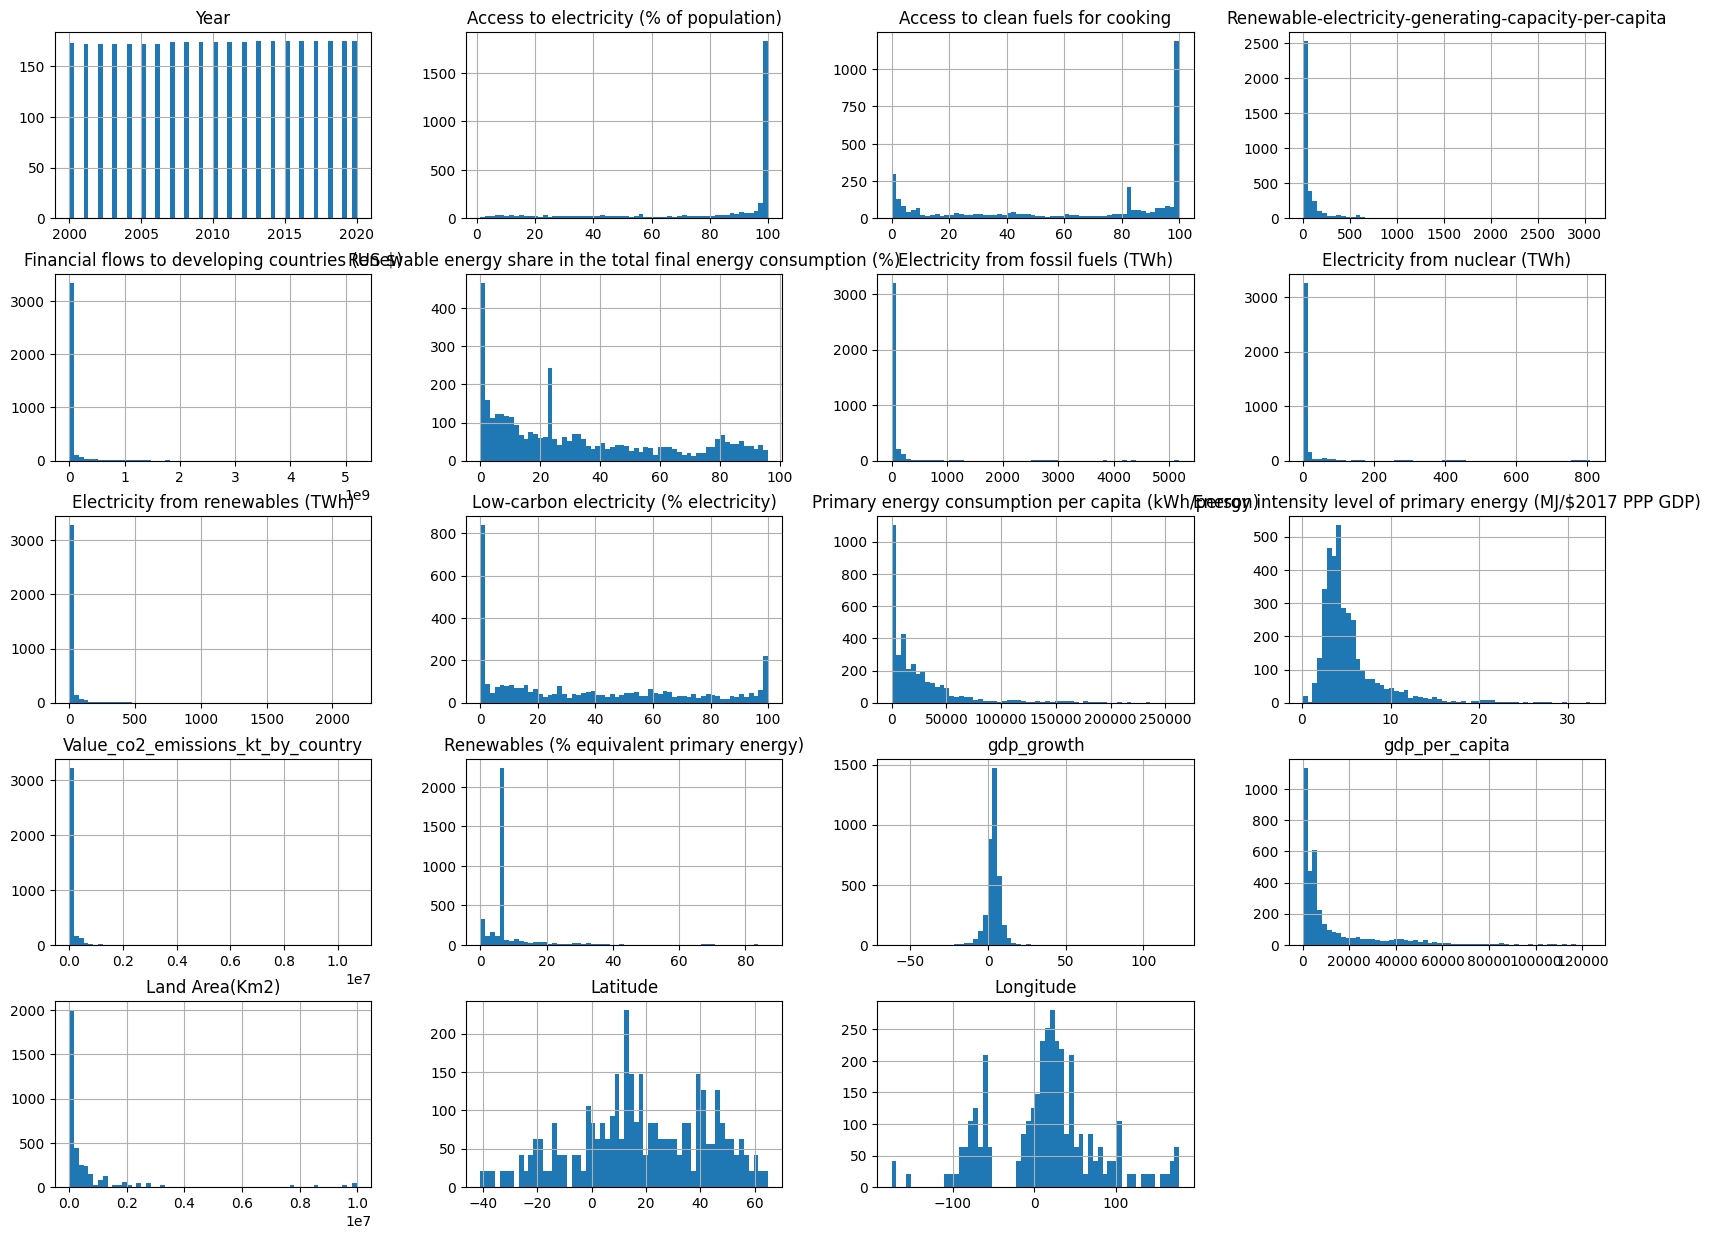

In [31]:
#Plotting Historgram
import seaborn as sns
import matplotlib.pyplot as plt

data.hist(figsize=(20, 15), bins=60)
plt.show()

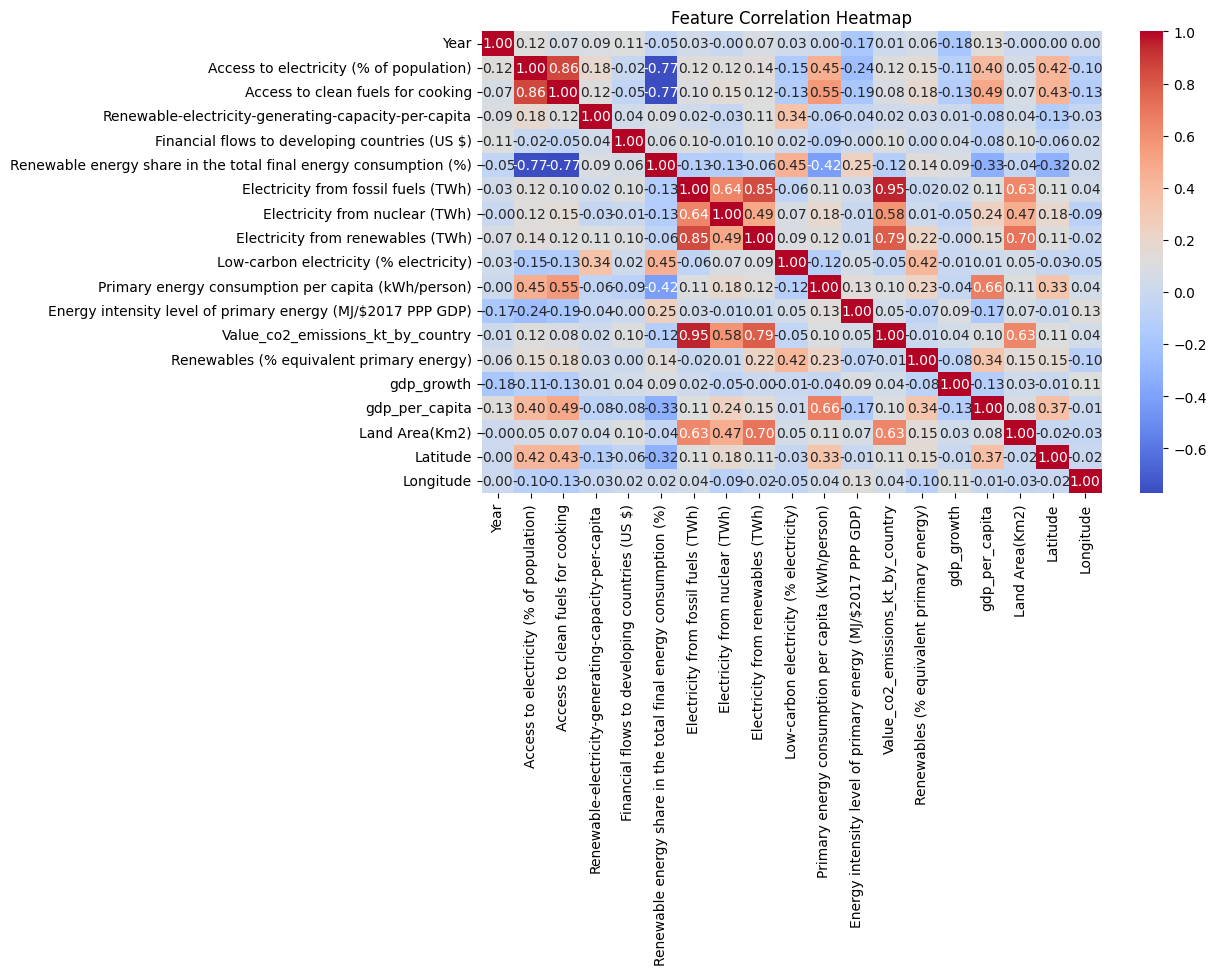

In [32]:
#Coreation matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_data = data.select_dtypes(include=["number"])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

REGRESSION- RENEWABLE ENERGY PREDICTION

In [36]:
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000.0,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,6.290766,3.559855,4578.633208,60,652230.0,33.93911,67.709953
1,Afghanistan,2001.0,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,6.290766,3.559855,4578.633208,60,652230.0,33.93911,67.709953
2,Afghanistan,2002.0,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,6.290766,3.559855,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003.0,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,6.290766,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004.0,20.064968,10.9,7.75,5665000.0,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,6.290766,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [38]:
# Define categorical features (qualitative variables with limited distinct values)
categorical_features = ["Entity"]

# Define numerical features (quantitative variables)
numerical_features = [
    "Year",
    "Access to electricity (% of population)",
    "Access to clean fuels for cooking",
    "Renewable-electricity-generating-capacity-per-capita",
    "Financial flows to developing countries (US $)",
    "Renewable energy share in the total final energy consumption (%)",
    "Electricity from fossil fuels (TWh)",
    "Electricity from nuclear (TWh)",
    "Electricity from renewables (TWh)",
    "Low-carbon electricity (% electricity)",
    "Primary energy consumption per capita (kWh/person)",
    "Energy intensity level of primary energy (MJ/$2017 PPP GDP)",
    "Value_co2_emissions_kt_by_country",
    "gdp_growth",
    "gdp_per_capita",
    "Density",
    "Land Area(Km2)",
    "Latitude",
    "Longitude"
]

# Define potential target variables for ML (choose one based on your project goal)
potential_targets = [
    "Value_co2_emissions_kt_by_country",  # If predicting emissions
    "Renewable energy share in the total final energy consumption (%)",  # If predicting renewable adoption
    "Access to electricity (% of population)"  # If predicting electrification
]

LINEAR REGRESSION

In [41]:
import pandas as pd

# 1. Isolate the categorical column(s)
categorical_features = ["Entity"]  # Country names

# 2. Perform one-hot encoding
data_encoded = pd.get_dummies(
    data, 
    columns=categorical_features,
    prefix='Country',  # Optional prefix for the new columns
    drop_first=False  # Set to True if you want to avoid multicollinearity
)

# 3. Verify the result
print(data_encoded.head())
print(f"\nNew columns: {[col for col in data_encoded.columns if 'Country_' in col][:5]}...")

     Year  Access to electricity (% of population)  \
0  2000.0                                 1.613591   
1  2001.0                                 4.074574   
2  2002.0                                 9.409158   
3  2003.0                                14.738506   
4  2004.0                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                         

In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

X = pd.DataFrame(X_imputed, columns=X.columns)


NameError: name 'X' is not defined

In [45]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-hot encoding categorical features
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cats = encoder.fit_transform(data[categorical_features])

# Convert to DataFrame
encoded_cats_data = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))


In [47]:
# Replace commas with empty strings and convert to floats
data[numerical_features] = data[numerical_features].replace({',': ''}, regex=True).astype(float)


In [49]:
# Identify non-numeric values
for feature in numerical_features:
    print(data[feature].apply(lambda x: isinstance(x, str)))


0       False
1       False
2       False
3       False
4       False
        ...  
3644    False
3645    False
3646    False
3647    False
3648    False
Name: Year, Length: 3649, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
3644    False
3645    False
3646    False
3647    False
3648    False
Name: Access to electricity (% of population), Length: 3649, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
3644    False
3645    False
3646    False
3647    False
3648    False
Name: Access to clean fuels for cooking, Length: 3649, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
3644    False
3645    False
3646    False
3647    False
3648    False
Name: Renewable-electricity-generating-capacity-per-capita, Length: 3649, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
3644    False
3645    False
3646    

In [51]:
scaler = StandardScaler()
scaled_numerics = scaler.fit_transform(data[numerical_features])
scaled_numerics_data = pd.DataFrame(scaled_numerics, columns=numerical_features)


In [53]:
# Combine numerical and categorical features
X = pd.concat([scaled_numerics_data, encoded_cats_data], axis=1)

# Define target variable
y = data["Value_co2_emissions_kt_by_country"]


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
print(f"Training Features (X_train) Size: {X_train.shape}")
print(f"Testing Features (X_test) Size: {X_test.shape}")
print(f"Training Labels (y_train) Size: {y_train.shape}")
print(f"Testing Labels (y_test) Size: {y_test.shape}")

Training Features (X_train) Size: (2919, 194)
Testing Features (X_test) Size: (730, 194)
Training Labels (y_train) Size: (2919,)
Testing Labels (y_test) Size: (730,)


In [59]:
print(X.isnull().sum().sum())  # Total count of NaNs in X


1


In [61]:
X.fillna(X.mean(), inplace=True)  # This will replace any remaining NaNs


In [63]:
print(X.isnull().sum().sum())

0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


In [67]:
y_pred = model.predict(X_test)

In [69]:
y_pred

array([3.95000005e+03, 1.05000000e+04, 1.23800001e+04, 2.15000000e+03,
       2.74399994e+05, 1.55080002e+05, 8.81100006e+04, 1.74940002e+05,
       2.16000000e+03, 1.05000000e+04, 9.39999998e+02, 4.81199989e+04,
       1.05000000e+04, 3.99999991e+01, 1.85550003e+05, 7.19999981e+03,
       1.01820000e+05, 1.08599997e+04, 6.60000026e+02, 6.10000000e+02,
       3.93000000e+03, 1.41999996e+03, 1.08999996e+04, 1.38999999e+03,
       1.05000000e+04, 3.55099983e+04, 4.94000006e+03, 4.95000000e+03,
       4.84999990e+03, 3.86380005e+05, 4.78000021e+03, 1.72299995e+04,
       4.09999996e+02, 5.99999987e+01, 1.19999997e+02, 2.33600006e+04,
       3.95000005e+03, 1.05000000e+04, 8.51000023e+03, 1.24300003e+04,
       2.27619995e+05, 4.00000006e+02, 2.97260010e+05, 6.76999998e+03,
       4.75309998e+05, 8.70000005e+02, 1.77999997e+03, 1.05000000e+04,
       3.19999993e+02, 6.16699982e+04, 5.00000008e+01, 5.25999985e+04,
       1.48000002e+03, 3.77799988e+04, 4.66500015e+04, 1.04399996e+04,
      

In [71]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R² Score: 1.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000


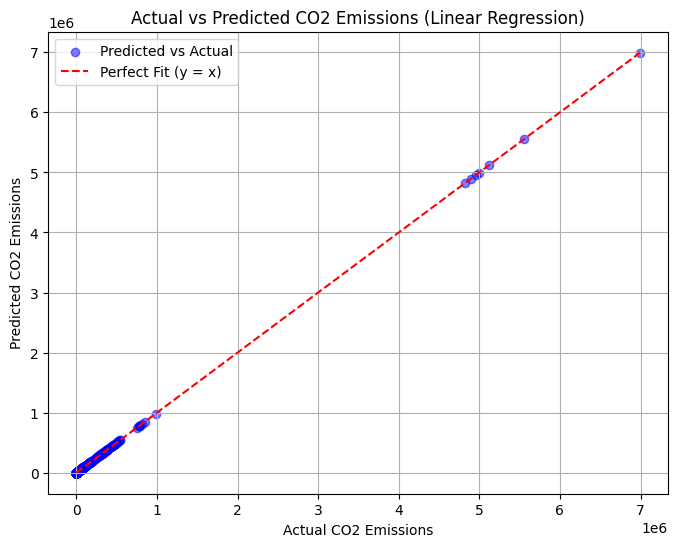

In [73]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted CO2 Emissions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', label="Perfect Fit (y = x)")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()



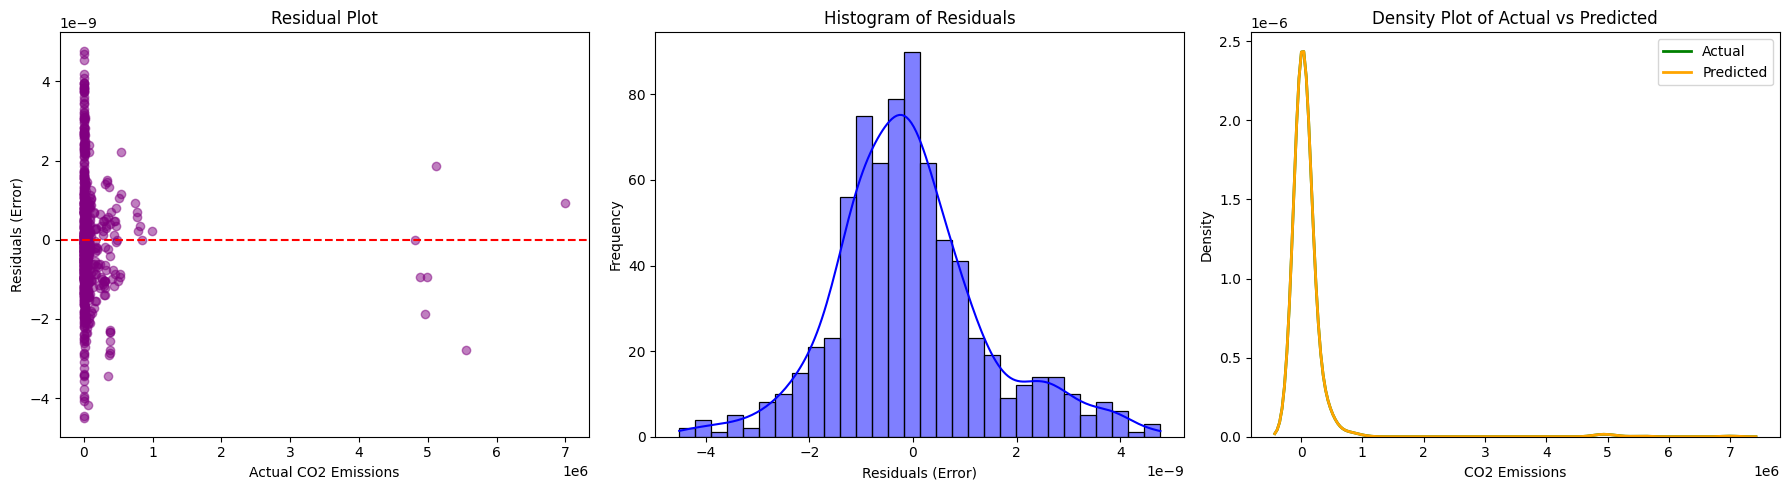

In [75]:
import seaborn as sns

# Calculate residuals (errors)
residuals = y_test - y_pred

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
 
# 1. Residual Plot (Errors vs. Actual Values)
axes[0].scatter(y_test, residuals, alpha=0.5, color="purple")
axes[0].axhline(y=0, color='red', linestyle='dashed')
axes[0].set_xlabel("Actual CO2 Emissions")
axes[0].set_ylabel("Residuals (Error)")
axes[0].set_title("Residual Plot")

# 2. Histogram of Residuals
sns.histplot(residuals, bins=30, kde=True, color="blue", ax=axes[1])
axes[1].set_xlabel("Residuals (Error)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals")

# 3. Density Plot (Actual vs Predicted Distribution)
sns.kdeplot(y_test, label="Actual", color="green", linewidth=2, ax=axes[2])
sns.kdeplot(y_pred, label="Predicted", color="orange", linewidth=2, ax=axes[2])
axes[2].set_xlabel("CO2 Emissions")
axes[2].set_ylabel("Density")
axes[2].set_title("Density Plot of Actual vs Predicted")
axes[2].legend()

# Show plots
plt.tight_layout()
plt.show()

DECISION TREE 

In [78]:
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regressor with default parameters
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on training data
dt_model.fit(X_train, y_train)



DecisionTreeRegressor(random_state=42)

In [80]:
y_pred_dt = dt_model.predict(X_test)
y_pred_dt

array([3.95000005e+03, 1.05000000e+04, 1.22799997e+04, 2.13000011e+03,
       2.70269989e+05, 1.54899994e+05, 8.76300000e+04, 1.74729996e+05,
       2.13000011e+03, 1.05000000e+04, 9.30000007e+02, 4.86300011e+04,
       1.05000000e+04, 3.99999991e+01, 1.85619995e+05, 7.19000006e+03,
       1.01730003e+05, 1.10200005e+04, 6.60000026e+02, 6.10000014e+02,
       3.94000006e+03, 1.42000000e+03, 1.10299997e+04, 1.37999999e+03,
       1.05000000e+04, 3.57099991e+04, 4.92999983e+03, 4.99000000e+03,
       4.88000011e+03, 3.87070007e+05, 4.76999998e+03, 1.72399998e+04,
       4.09999996e+02, 5.99999987e+01, 1.19999997e+02, 2.35499992e+04,
       3.94000006e+03, 1.05000000e+04, 8.56999970e+03, 1.22799997e+04,
       2.27580002e+05, 4.00000005e+02, 2.94790000e+05, 6.78000021e+03,
       4.78399994e+05, 8.70000005e+02, 1.76999998e+03, 1.05000000e+04,
       3.19999993e+02, 6.25299988e+04, 5.00000007e+01, 5.29199982e+04,
       1.47000003e+03, 3.77500000e+04, 4.64700012e+04, 1.03900003e+04,
      

In [82]:
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print(f"R² Score: {r2_dt :.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")

R² Score: 0.9959
Mean Squared Error (MSE): 1182387026.6749
Root Mean Squared Error (RMSE): 34385.8550


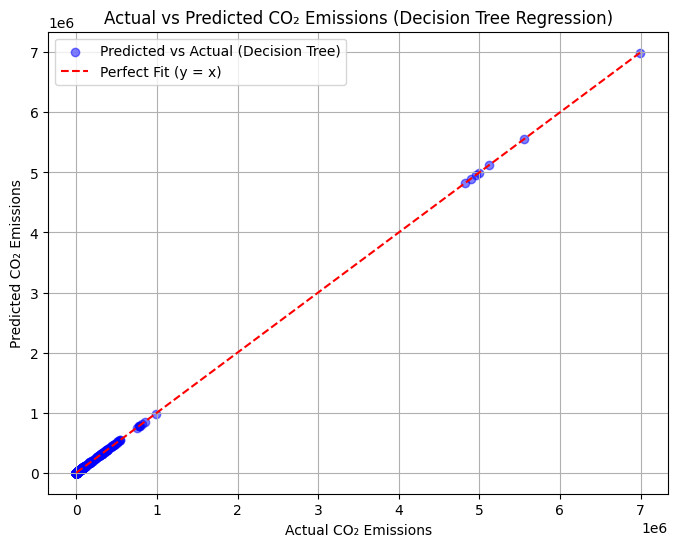

In [84]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted CO₂ Emissions (Decision Tree Regression)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predicted vs Actual (Decision Tree)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', label="Perfect Fit (y = x)")
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Actual vs Predicted CO₂ Emissions (Decision Tree Regression)")
plt.legend()
plt.grid(True)
plt.show()


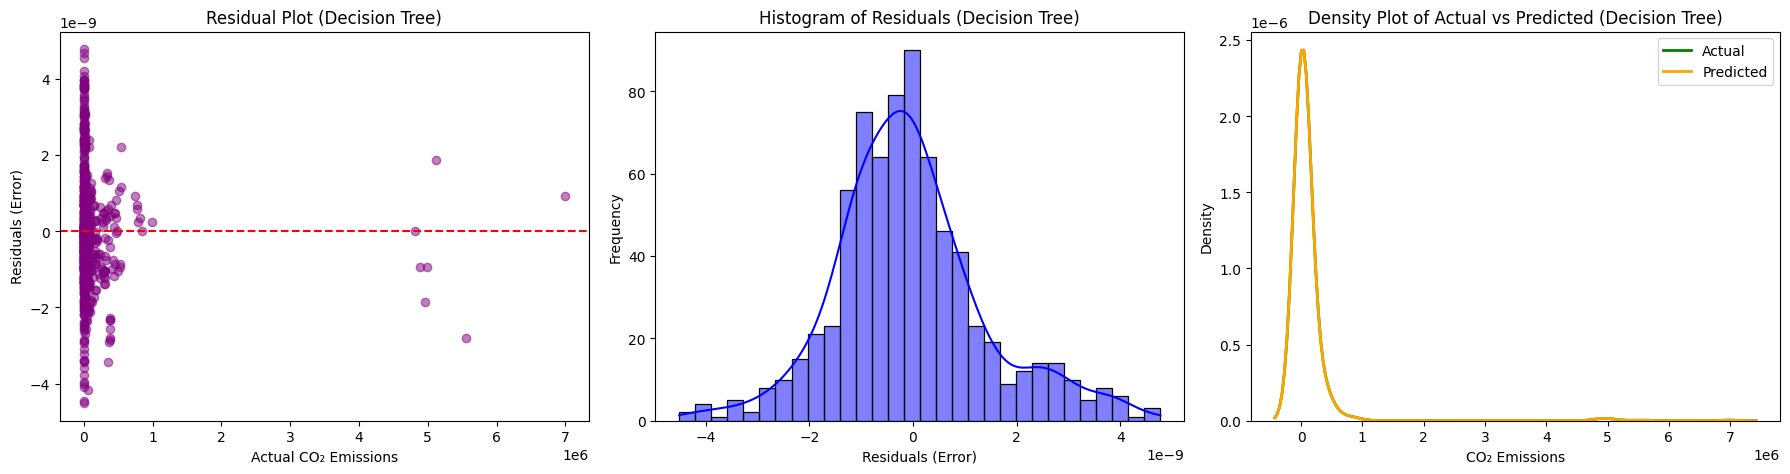

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals (errors)
residuals = y_test - y_pred  # Ensure y_pred is from Decision Tree Regressor

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residual Plot (Errors vs. Actual Values)
axes[0].scatter(y_test, residuals, alpha=0.5, color="purple")
axes[0].axhline(y=0, color='red', linestyle='dashed')
axes[0].set_xlabel("Actual CO₂ Emissions")
axes[0].set_ylabel("Residuals (Error)")
axes[0].set_title("Residual Plot (Decision Tree)")

# 2. Histogram of Residuals
sns.histplot(residuals, bins=30, kde=True, color="blue", ax=axes[1])
axes[1].set_xlabel("Residuals (Error)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals (Decision Tree)")

# 3. Density Plot (Actual vs Predicted Distribution)
sns.kdeplot(y_test, label="Actual", color="green", linewidth=2, ax=axes[2])
sns.kdeplot(y_pred, label="Predicted", color="orange", linewidth=2, ax=axes[2])
axes[2].set_xlabel("CO₂ Emissions")
axes[2].set_ylabel("Density")
axes[2].set_title("Density Plot of Actual vs Predicted (Decision Tree)")
axes[2].legend()

# Show plots
plt.tight_layout()
plt.show()


POLYNOMIAL REGRESSION

In [89]:
from sklearn.preprocessing import PolynomialFeatures

# Define polynomial degree (default: 2 for quadratic relationships)
degree = 2

# Transform features to polynomial form
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [91]:
print(f"Training Features (X_train) Size: {X_train_poly.shape}")
print(f"Testing Features (X_test) Size: {X_test_poly.shape}")

Training Features (X_train) Size: (2919, 19109)
Testing Features (X_test) Size: (730, 19109)


In [93]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [94]:
y_pred_poly = poly_model.predict(X_test_poly)
y_pred_poly 

array([3.95000005e+03, 1.05000000e+04, 1.23800001e+04, 2.15000000e+03,
       2.74399994e+05, 1.55077607e+05, 8.81079440e+04, 1.74940002e+05,
       2.16000000e+03, 1.05000000e+04, 9.39999998e+02, 4.80775295e+04,
       1.05000000e+04, 3.99999991e+01, 1.85550003e+05, 7.22169361e+03,
       1.01820000e+05, 1.08599997e+04, 6.60000026e+02, 6.10000000e+02,
       3.93000000e+03, 1.41998555e+03, 1.08999996e+04, 1.38999999e+03,
       1.05000000e+04, 3.55099983e+04, 4.94000006e+03, 4.95510831e+03,
       4.84999991e+03, 3.86380005e+05, 4.78000021e+03, 1.72299995e+04,
       4.09999996e+02, 5.99999987e+01, 1.19999997e+02, 2.33604478e+04,
       3.95000005e+03, 1.05000000e+04, 8.51000023e+03, 1.24300003e+04,
       2.27619995e+05, 4.00000006e+02, 2.97260010e+05, 6.76999998e+03,
       4.75309998e+05, 8.70000005e+02, 1.77999997e+03, 1.05000000e+04,
       3.19999993e+02, 6.16699982e+04, 5.00000008e+01, 5.25999985e+04,
       1.48000002e+03, 3.77799988e+04, 4.66500015e+04, 1.04399996e+04,
      

In [95]:
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

In [96]:
print(f"R² Score: {r2_poly:.4f}")
print(f"Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly :.4f}")

R² Score: 1.0000
Mean Squared Error (MSE): 41.0567
Root Mean Squared Error (RMSE): 6.4075


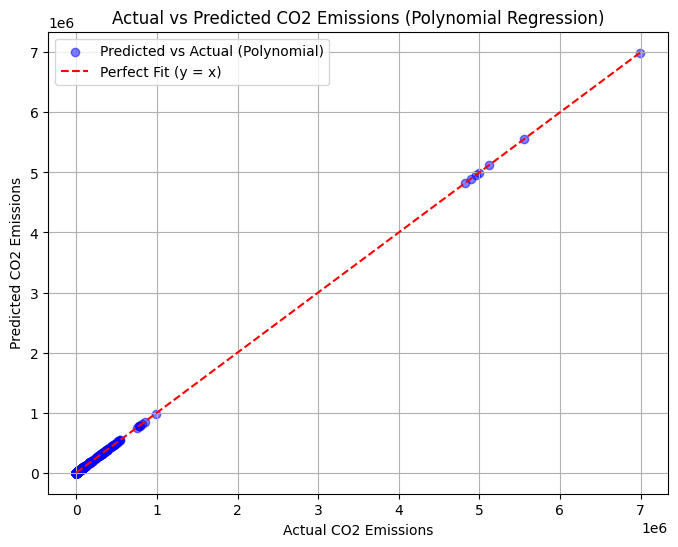

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='blue', label="Predicted vs Actual (Polynomial)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', label="Perfect Fit (y = x)")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (Polynomial Regression)")
plt.legend()
plt.grid(True)
plt.show()

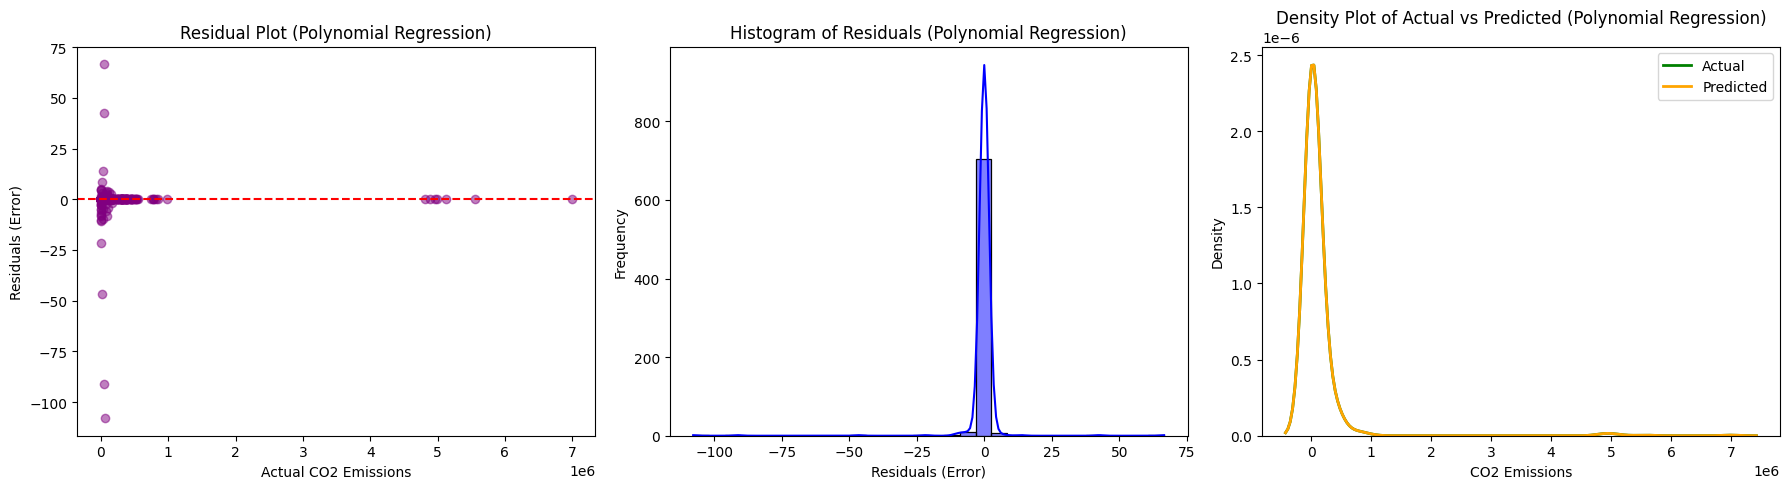

In [98]:
residuals_poly = y_test - y_pred_poly

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residual Plot (Errors vs. Actual Values)
axes[0].scatter(y_test, residuals_poly, alpha=0.5, color="purple")
axes[0].axhline(y=0, color='red', linestyle='dashed')
axes[0].set_xlabel("Actual CO2 Emissions")
axes[0].set_ylabel("Residuals (Error)")
axes[0].set_title("Residual Plot (Polynomial Regression)")

# 2. Histogram of Residuals
sns.histplot(residuals_poly, bins=30, kde=True, color="blue", ax=axes[1])
axes[1].set_xlabel("Residuals (Error)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals (Polynomial Regression)")

# 3. Density Plot (Actual vs Predicted Distribution)
sns.kdeplot(y_test, label="Actual", color="green", linewidth=2, ax=axes[2])
sns.kdeplot(y_pred_poly, label="Predicted", color="orange", linewidth=2, ax=axes[2])
axes[2].set_xlabel("CO2 Emissions")
axes[2].set_ylabel("Density")
axes[2].set_title("Density Plot of Actual vs Predicted (Polynomial Regression)")
axes[2].legend()

# Show plots
plt.tight_layout()
plt.show()


RANDOM FOREST REGRESSION


In [100]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor with default parameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([3.95011356e+03, 1.05000000e+04, 1.23802998e+04, 2.14590007e+03,
       2.70925197e+05, 1.55501602e+05, 8.76937999e+04, 1.74934097e+05,
       2.14700007e+03, 1.05000000e+04, 9.39200001e+02, 4.82449003e+04,
       1.04993000e+04, 3.79999994e+01, 1.84339700e+05, 7.18550003e+03,
       1.01975201e+05, 1.09228001e+04, 6.60100026e+02, 6.11161673e+02,
       3.94992707e+03, 1.41229999e+03, 1.09582000e+04, 1.37989456e+03,
       1.05000000e+04, 3.53608996e+04, 4.94086214e+03, 4.95169997e+03,
       4.84076226e+03, 3.87520302e+05, 4.76819735e+03, 1.72248001e+04,
       4.10299996e+02, 5.99999987e+01, 1.19899997e+02, 2.35367997e+04,
       3.94810005e+03, 1.05000000e+04, 8.51590009e+03, 1.24216998e+04,
       2.27572201e+05, 4.00500004e+02, 2.94265000e+05, 6.75730008e+03,
       4.76417796e+05, 8.70534564e+02, 1.77909998e+03, 1.05000000e+04,
       3.18999996e+02, 6.18547001e+04, 4.87000004e+01, 5.28129994e+04,
       1.47950002e+03, 3.77151006e+04, 4.64951001e+04, 1.04261001e+04,
      

In [102]:
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"R² Score: {r2_rf  :.4f}")
print(f"Mean Squared Error (MSE): {mse_rf :.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf :.4f}")

R² Score: 0.9989
Mean Squared Error (MSE): 317789879.1257
Root Mean Squared Error (RMSE): 17826.6620


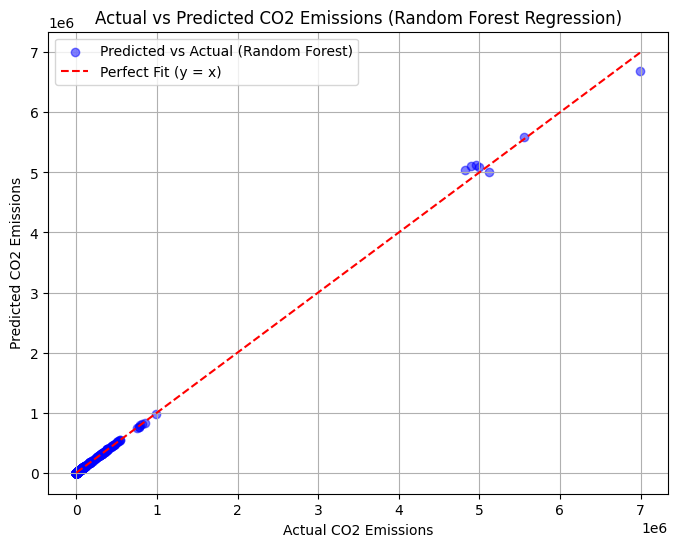

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='blue', label="Predicted vs Actual (Random Forest)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', label="Perfect Fit (y = x)")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (Random Forest Regression)")
plt.legend()
plt.grid(True)
plt.show()

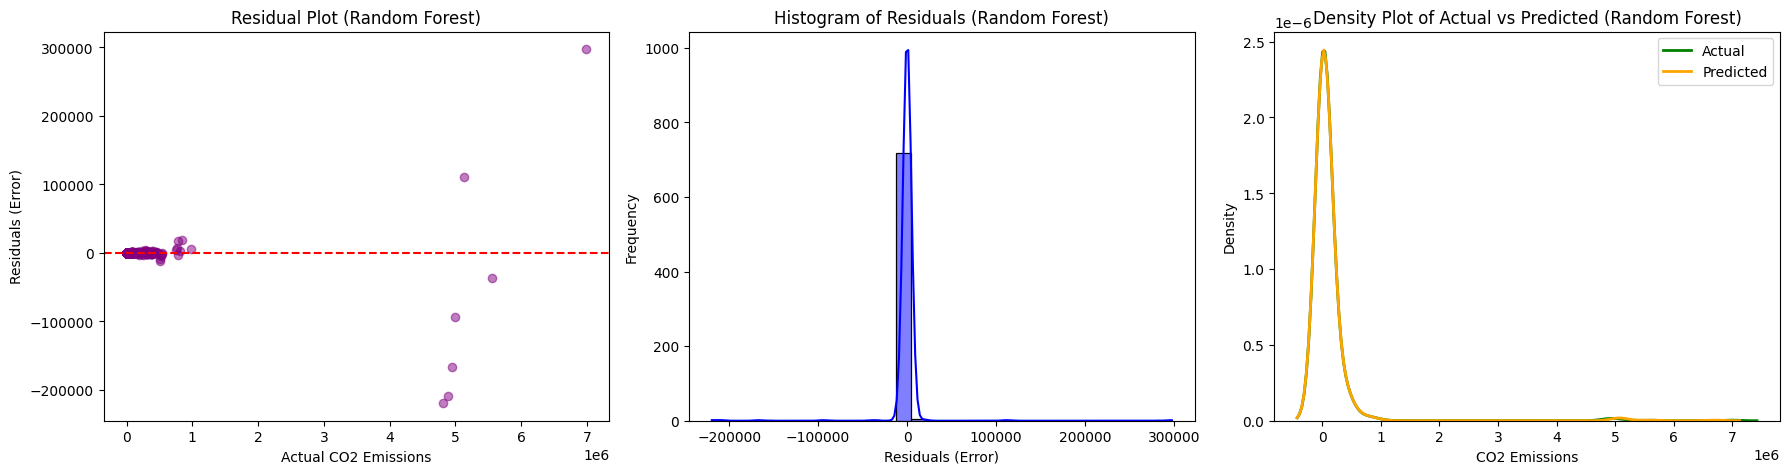

In [104]:
residuals_rf = y_test - y_pred_rf

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residual Plot (Errors vs. Actual Values)
axes[0].scatter(y_test, residuals_rf, alpha=0.5, color="purple")
axes[0].axhline(y=0, color='red', linestyle='dashed')
axes[0].set_xlabel("Actual CO2 Emissions")
axes[0].set_ylabel("Residuals (Error)")
axes[0].set_title("Residual Plot (Random Forest)")

# 2. Histogram of Residuals
sns.histplot(residuals_rf, bins=30, kde=True, color="blue", ax=axes[1])
axes[1].set_xlabel("Residuals (Error)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals (Random Forest)")

# 3. Density Plot (Actual vs Predicted Distribution)
sns.kdeplot(y_test, label="Actual", color="green", linewidth=2, ax=axes[2])
sns.kdeplot(y_pred_rf, label="Predicted", color="orange", linewidth=2, ax=axes[2])
axes[2].set_xlabel("CO2 Emissions")
axes[2].set_ylabel("Density")
axes[2].set_title("Density Plot of Actual vs Predicted (Random Forest)")
axes[2].legend()

# Show plots
plt.tight_layout()
plt.show()


SUPPORT VECTOR 

In [106]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardizing features (SVR is sensitive to feature scaling)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Initialize and train SVR model with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)

SVR()

In [107]:
y_pred_svr_scaled = svr_model.predict(X_test_scaled)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()
y_pred_svr

array([  64781.05393592,   86532.44334955,   67615.96208609,
         77872.48130254,  230271.68659178,  127900.77554622,
        253099.09746552,  179359.37905066,   71579.84183256,
         94762.63700875,   56238.05578589,  111785.31723996,
         73253.33647888,   70081.0514091 ,  139800.87186475,
         68129.17474816,  122856.13726185,   68629.83854652,
         51996.37180799,   74519.33287488,   76513.54575137,
         75738.72448746,   84040.62926592,   48397.0724943 ,
         60872.36083283,   85026.72441773,   71216.37650075,
         83254.17936949,   67292.78491082,  391352.42900119,
        -68600.07849751,   90702.99176819,   66572.96219229,
         40087.44585148,   76252.23943164,   90849.50232853,
         80350.23091445,  127426.3402255 ,   64713.43434958,
         64147.74667366,  178159.01763435,   57961.93449102,
        235089.14140597,   75525.8114622 ,  469470.27740843,
         47608.25812038,   60917.66439608,   86467.8550518 ,
         56933.30789348,

In [108]:
r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
print(f"R² Score: {r2_svr   :.4f}")
print(f"Mean Squared Error (MSE): {mse_svr :.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr :.4f}")

R² Score: 0.9833
Mean Squared Error (MSE): 4767954734.9239
Root Mean Squared Error (RMSE): 69050.3782


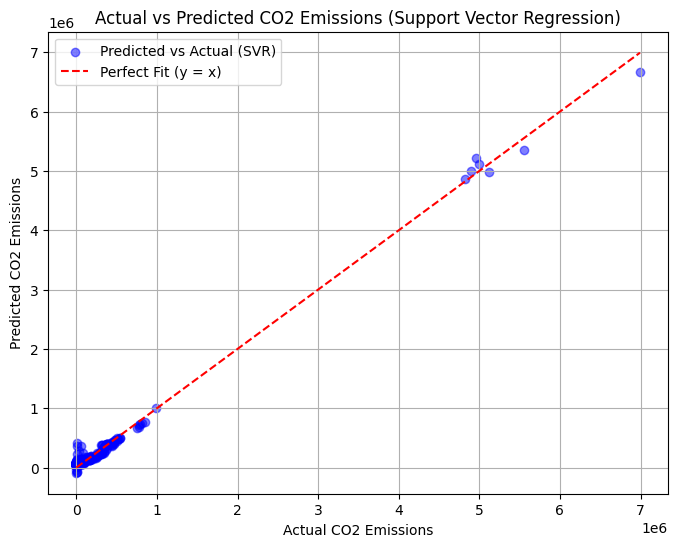

In [109]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted CO2 Emissions (Support Vector Regression - SVR)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.5, color='blue', label="Predicted vs Actual (SVR)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', label="Perfect Fit (y = x)")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (Support Vector Regression)")
plt.legend()
plt.grid(True)
plt.show()

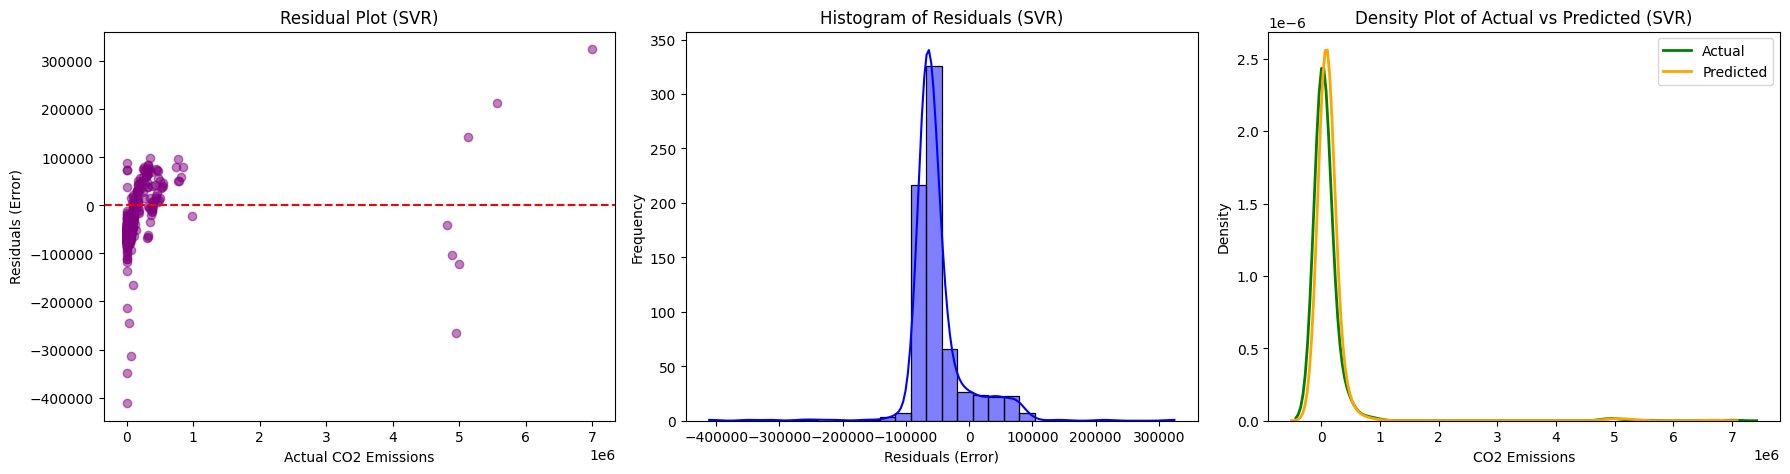

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for SVR
residuals_svr = y_test - y_pred_svr

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residual Plot (Errors vs. Actual Values)
axes[0].scatter(y_test, residuals_svr, alpha=0.5, color="purple")
axes[0].axhline(y=0, color='red', linestyle='dashed')
axes[0].set_xlabel("Actual CO2 Emissions")
axes[0].set_ylabel("Residuals (Error)")
axes[0].set_title("Residual Plot (SVR)")

# 2. Histogram of Residuals
sns.histplot(residuals_svr, bins=30, kde=True, color="blue", ax=axes[1])
axes[1].set_xlabel("Residuals (Error)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals (SVR)")

# 3. Density Plot (Actual vs Predicted Distribution)
sns.kdeplot(y_test, label="Actual", color="green", linewidth=2, ax=axes[2])
sns.kdeplot(y_pred_svr, label="Predicted", color="orange", linewidth=2, ax=axes[2])
axes[2].set_xlabel("CO2 Emissions")
axes[2].set_ylabel("Density")
axes[2].set_title("Density Plot of Actual vs Predicted (SVR)")
axes[2].legend()

# Show plots
plt.tight_layout()
plt.show()

GRADIENT BOOST

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Initialize and train Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [113]:
y_pred_gbr = gbr_model.predict(X_test)
y_pred_gbr

array([3.88994155e+03, 1.04840265e+04, 1.19196681e+04, 2.20556610e+03,
       2.69952239e+05, 1.58741414e+05, 8.51305835e+04, 1.81298842e+05,
       2.22879884e+03, 1.04548355e+04, 1.04295330e+03, 4.60310213e+04,
       1.05887538e+04, 3.87311723e+02, 1.81398780e+05, 7.16364296e+03,
       9.80679018e+04, 1.07070407e+04, 7.71198989e+02, 7.04328832e+02,
       3.88994155e+03, 1.43258491e+03, 1.07296250e+04, 1.43258491e+03,
       1.06252243e+04, 3.29443611e+04, 5.13199936e+03, 5.13199936e+03,
       5.13199936e+03, 3.82939781e+05, 4.45975786e+03, 1.64823842e+04,
       5.62041587e+02, 3.87311723e+02, 3.98520514e+02, 2.45575620e+04,
       3.88994155e+03, 1.06679753e+04, 8.26668080e+03, 1.19196681e+04,
       2.16718202e+05, 5.62041587e+02, 2.94919601e+05, 6.96626401e+03,
       4.73529280e+05, 1.01040302e+03, 1.74530034e+03, 1.04840265e+04,
       4.81148571e+02, 6.26547776e+04, 3.87311723e+02, 5.17420581e+04,
       1.62185449e+03, 3.77504580e+04, 4.61363020e+04, 1.05006526e+04,
      

In [114]:
r2_gbr = r2_score(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f"R² Score: {r2_gbr:.4f}")
print(f"Mean Squared Error: {mse_gbr:.2f}")
print(f"Root Mean Squared Error: {rmse_gbr:.2f}")

R² Score: 0.9996
Mean Squared Error: 124247976.40
Root Mean Squared Error: 11146.66


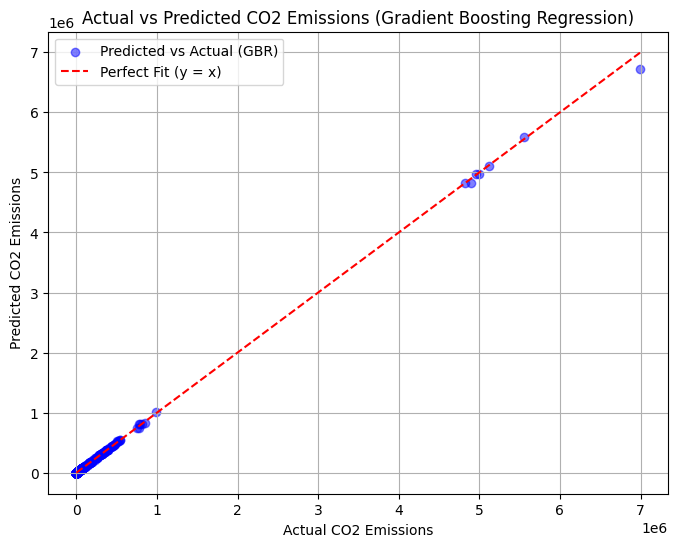

In [115]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted CO2 Emissions (Gradient Boosting Regression - GBR)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color='blue', label="Predicted vs Actual (GBR)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', label="Perfect Fit (y = x)")
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions (Gradient Boosting Regression)")
plt.legend()
plt.grid(True)
plt.show()

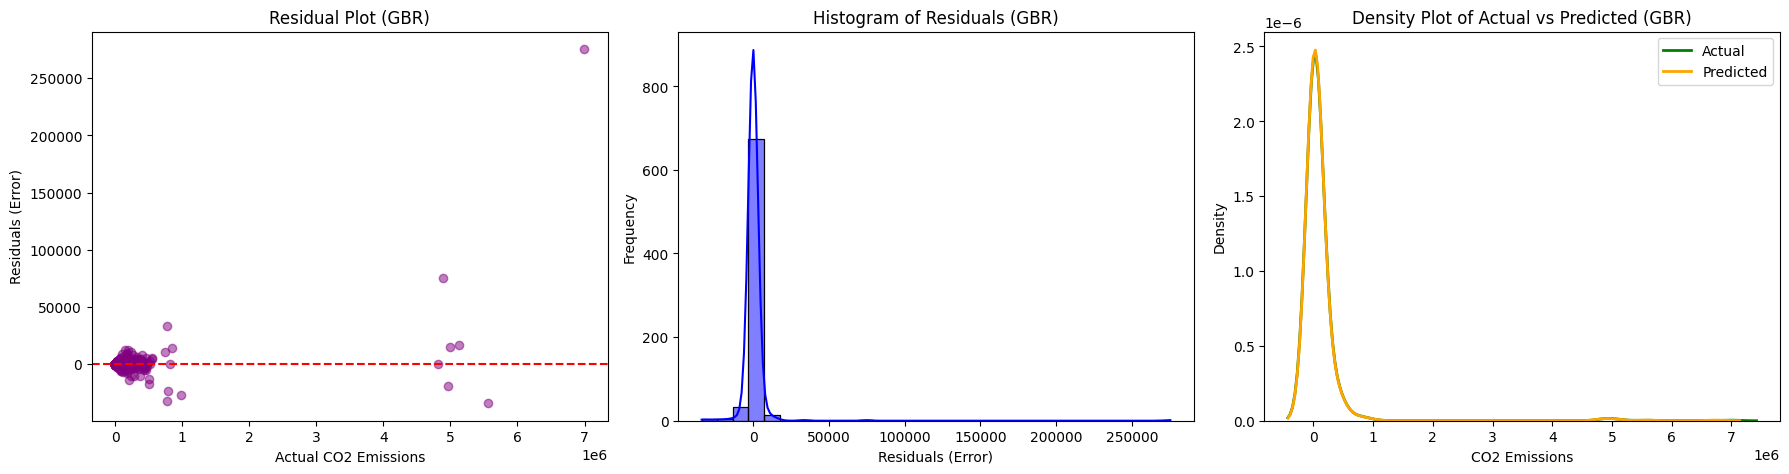

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals for GBR
residuals_gbr = y_test - y_pred_gbr

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Residual Plot (Errors vs. Actual Values)
axes[0].scatter(y_test, residuals_gbr, alpha=0.5, color="purple")
axes[0].axhline(y=0, color='red', linestyle='dashed')
axes[0].set_xlabel("Actual CO2 Emissions")
axes[0].set_ylabel("Residuals (Error)")
axes[0].set_title("Residual Plot (GBR)")

# 2. Histogram of Residuals
sns.histplot(residuals_gbr, bins=30, kde=True, color="blue", ax=axes[1])
axes[1].set_xlabel("Residuals (Error)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Residuals (GBR)")

# 3. Density Plot (Actual vs Predicted Distribution)
sns.kdeplot(y_test, label="Actual", color="green", linewidth=2, ax=axes[2])
sns.kdeplot(y_pred_gbr, label="Predicted", color="orange", linewidth=2, ax=axes[2])
axes[2].set_xlabel("CO2 Emissions")
axes[2].set_ylabel("Density")
axes[2].set_title("Density Plot of Actual vs Predicted (GBR)")
axes[2].legend()

# Show plots
plt.tight_layout()
plt.show()